<a id="0"></a> <br>
 # Table of Contents  
 
 1. [Package Set up and data Input](#1)     
 1. [Data Preprocessing](#2) 
 1. [Modeling Fitting and Evaluation](#3) 
    1. [ROC_AUC Curve](#4)
    1. [Model Coefficients](#5)
    1. [Confusion Matrix](#6)
    1. [ROC Curve](#7)
    1. [Plot of Precision and Recall Versus the Decision Threshold](#8)
    1. [Prediction Adjustment and Results](#9)

<a id="1"></a> <br>
 ## Package Set up and Data Input

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,  roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import classification_report

#import matplotlib.pyplot as plt
#bimport seaborn as sns

%run functions.ipynb

In [2]:
os.getcwd()

'/Users/luzhang/Documents/GitHub/Projects/All Lending Club loan data/Code'

In [3]:
data = pd.read_csv("../Data/data_selected.csv")
data = pd.DataFrame(data)
data.isnull().sum() # check the na

Unnamed: 0                  0
loan_status                 0
term                        0
grade                       0
emp_length              69822
home_ownership              0
verification_status         0
purpose                     0
addr_state                  0
initial_list_status         0
application_type            0
loan_amnt                   0
int_rate                    0
installment                 0
annual_inc                  0
dti                         0
open_acc                    0
pub_rec                     0
revol_util                  0
total_acc                   0
mort_acc                    0
pub_rec_bankruptcies        0
last_fico_range_low         0
last_fico_range_high        0
dtype: int64

In [4]:
data = data.dropna() # drop na
data.isnull().sum()

Unnamed: 0              0
loan_status             0
term                    0
grade                   0
emp_length              0
home_ownership          0
verification_status     0
purpose                 0
addr_state              0
initial_list_status     0
application_type        0
loan_amnt               0
int_rate                0
installment             0
annual_inc              0
dti                     0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
last_fico_range_low     0
last_fico_range_high    0
dtype: int64

In [5]:
data["loan_status"].value_counts()

Fully Paid     919547
Charged Off    198560
Name: loan_status, dtype: int64

In [6]:
# covert catergocial to dummy
loan_status = pd.get_dummies(data["loan_status"])
data["loan_status"] = loan_status["Fully Paid"] # 1-full paid, 0-charged off
data

,Unnamed: 0,loan_status,term,grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,...,annual_inc,dti,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,last_fico_range_low,last_fico_range_high
0,0,1,36 months,C,10+ years,MORTGAGE,Not Verified,debt_consolidation,PA,w,...,55000.0,5.91,7.0,0.0,29.7,13.0,1.0,0.0,560.0,564.0
1,1,1,36 months,C,10+ years,MORTGAGE,Not Verified,small_business,SD,w,...,65000.0,16.06,22.0,0.0,19.2,38.0,4.0,0.0,695.0,699.0
2,2,1,60 months,B,10+ years,MORTGAGE,Not Verified,home_improvement,IL,w,...,63000.0,10.78,6.0,0.0,56.2,18.0,5.0,0.0,700.0,704.0
3,4,1,60 months,F,3 years,MORTGAGE,Source Verified,major_purchase,PA,w,...,104433.0,25.37,12.0,0.0,64.5,35.0,6.0,0.0,700.0,704.0
4,5,1,36 months,C,4 years,RENT,Source Verified,debt_consolidation,GA,w,...,34000.0,10.20,5.0,0.0,68.4,6.0,0.0,0.0,755.0,759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187924,2260685,0,60 months,C,5 years,RENT,Verified,credit_card,CA,f,...,95000.0,21.50,11.0,0.0,79.8,24.0,6.0,0.0,550.0,554.0
1187925,2260686,1,60 months,C,10+ years,MORTGAGE,Not Verified,debt_consolidation,OH,f,...,119000.0,32.73,13.0,0.0,89.5,29.0,5.0,0.0,675.0,679.0
1187926,2260688,1,60 months,B,5 years,OWN,Not Verified,home_improvement,TX,f,...,130000.0,20.59,17.0,0.0,34.0,39.0,3.0,0.0,705.0,709.0
1187927,2260690,1,60 months,C,9 years,MORTGAGE,Not Verified,debt_consolidation,CA,f,...,180792.0,22.03,16.0,0.0,85.2,32.0,3.0,0.0,715.0,719.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118107 entries, 0 to 1187928
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1118107 non-null  int64  
 1   loan_status           1118107 non-null  uint8  
 2   term                  1118107 non-null  object 
 3   grade                 1118107 non-null  object 
 4   emp_length            1118107 non-null  object 
 5   home_ownership        1118107 non-null  object 
 6   verification_status   1118107 non-null  object 
 7   purpose               1118107 non-null  object 
 8   addr_state            1118107 non-null  object 
 9   initial_list_status   1118107 non-null  object 
 10  application_type      1118107 non-null  object 
 11  loan_amnt             1118107 non-null  float64
 12  int_rate              1118107 non-null  float64
 13  installment           1118107 non-null  float64
 14  annual_inc            1118107 non-

<a id="2"></a> <br>
## Data Preprocessing

In [8]:
y = data.loan_status
X = data.drop(["loan_status", 'Unnamed: 0'], axis =1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666, test_size = 0.25, shuffle = True)

In [10]:
numeric_features = ['int_rate',
       'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'last_fico_range_low',
       'last_fico_range_high']
categorical_features = ['term', 'grade', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'addr_state',
       'initial_list_status', 'application_type']

In [11]:
categorical_transformer = Pipeline(steps =[
    ('onehot',OneHotEncoder(drop = "first"))
])

numeric_transformer = Pipeline(steps =[
    ("scale", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [12]:
log_model = LogisticRegression(solver = "lbfgs", max_iter = 500)
pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("log_model", log_model)
])

<a id="3"></a> <br>
## Model fitting and Evaluation

In [15]:
fitted_pipeline = pipeline.fit(X_train, y_train)

In [16]:
y_train_pred = fitted_pipeline.predict(X_train)
y_test_pred = fitted_pipeline.predict(X_test)


train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

<a id="4"></a> <br>
### ROC_AUC score

In [18]:
print("train_auc: ", round(train_auc,4),"test_auc: ", round(test_auc,4))

train_auc:  0.8263 test_auc:  0.8274


In [19]:
cat_onehot = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features = categorical_features)
col_names = list(numeric_features)+list(cat_onehot)
all_col_names = ['Constant']+col_names
all_coef = np.hstack((log_model.intercept_[0],log_model.coef_[0]))
model_coef = pd.DataFrame({'features':all_col_names,'coef':all_coef,})

<a id="5"></a> <br>
### Model coefficient

In [34]:
model_coef

,features,coef
0,Constant,3.120576
1,int_rate,-0.024579
2,installment,-0.369905
3,annual_inc,0.111550
4,dti,-0.221364
...,...,...
95,addr_state_WI,-0.044152
96,addr_state_WV,0.323972
97,addr_state_WY,0.073753
98,initial_list_status_w,-0.106376


<a id="6"></a> <br>
### Confusion Matrix

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test,y_test_pred)
cnf_matrix

array([[ 34861,  14875],
       [ 10602, 219189]])

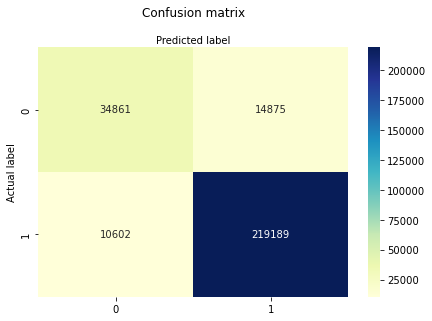

In [22]:
confusion_metrix_vis(cnf_matrix)

In [23]:
target_names = ['Charge-off', 'Fully Paid']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

  Charge-off       0.77      0.70      0.73     49736
  Fully Paid       0.94      0.95      0.95    229791

    accuracy                           0.91    279527
   macro avg       0.85      0.83      0.84    279527
weighted avg       0.91      0.91      0.91    279527



<a id="7"></a> <br>
### ROC_Curve

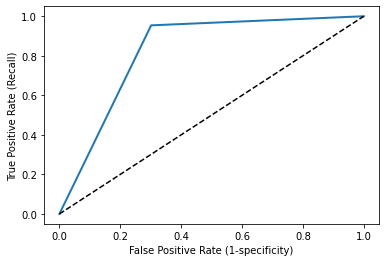

In [24]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr,tpr)

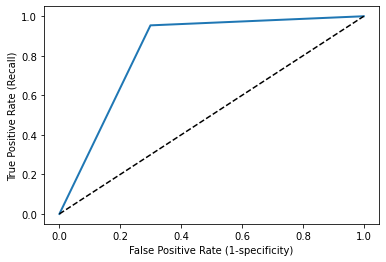

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr,tpr)

<a id="8"></a> <br>
### Plot of Precision and Recall Versus the Decision Threshold

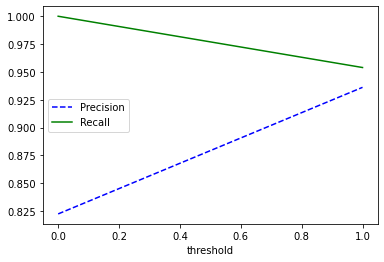

In [26]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

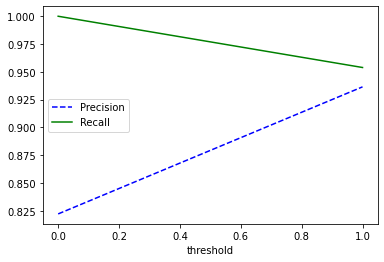

In [27]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

The model metrix indicates that the model is very good at predicting the positive instance ("Fully Paid"), which is primarily due to the fact that we have more positive samples than negative ones. However, in this endeavor we are attempting to control risk, so we are focusing more on False Positives (that is, predicting "Fully Paid" cases that are actually charged off), which will result in monetary loss for the business. In other words, we desire a low number of False Positives, or a greater number of precisions (TP/(TP+FN)).
In such a case, a threshold of 0.9 may be the optimal choice for aligning our objectives. 

<a id="9"></a> <br>
### Prediction Adjustment and Results

In [28]:
threshold = 0.9
y_train_pred = fitted_pipeline.predict_proba(X_train)
y_test_pred = fitted_pipeline.predict_proba(X_test)
y_train_pred = (y_train_pred[:,1] > threshold).astype(int)
y_test_pred = (y_test_pred[:,1] > threshold).astype(int)

In [29]:
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

In [30]:
print("train_auc after new threshold : ", round(train_auc,4),"test_auc after new threshold: ", round(test_auc,4))

train_auc after new threshold :  0.8865 test_auc after new threshold:  0.8869


ROC_AUC socre were improved

In [31]:
target_names = ['Charge-off', 'Fully Paid']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

  Charge-off       0.55      0.94      0.69     49736
  Fully Paid       0.99      0.83      0.90    229791

    accuracy                           0.85    279527
   macro avg       0.77      0.89      0.80    279527
weighted avg       0.91      0.85      0.86    279527



In [32]:
cnf_matrix = metrics.confusion_matrix(y_test,y_test_pred)
cnf_matrix

array([[ 46932,   2804],
       [ 39031, 190760]])

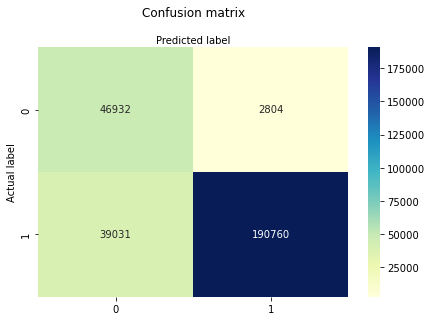

In [33]:
confusion_metrix_vis(cnf_matrix)

Recall (Ratio of "charge-off" instances that are correctly detected) of "Charge-off" has been significantly improved at the expense of recall of "Fully Paid", and precision of "Charge-off".However, we achieve our business objective by detecting "charge-off" instances as accurately as feasible.